In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Define the matrix to use

In [2]:
A = np.array([
    [2,    1,    0, 1],
    [3,    2,    0, 2],
    [1.99, 1.01, 0, 1],
    [0.5,  0.251, 0, 0.5],
    [0,    0,    1, 1]
])

A1 = np.array([
    [1, 1, 0, 0], 
    [1, 1, 1, 0], 
    [1, 1, 0, -2]
])

Y = np.array([
    [2.31, 1.92],
    [2.49, 1.68],
    [-2.31, -1.92],
    [-2.49, -1.68],
    [3.32, 2.24],
    [-3.08, -2.56],
    [-3.08, -2.56],
    [-3.32, -2.24]
])

A_centered = A - A.mean(axis=0)

print("Matrix A:")
print(pd.DataFrame(A, index=[f'Row{i+1}' for i in range(A.shape[0])],
                       columns=[f'Col{j+1}' for j in range(A.shape[1])]))



Matrix A:
      Col1   Col2  Col3  Col4
Row1  2.00  1.000   0.0   1.0
Row2  3.00  2.000   0.0   2.0
Row3  1.99  1.010   0.0   1.0
Row4  0.50  0.251   0.0   0.5
Row5  0.00  0.000   1.0   1.0


In [3]:
# Calculate the mean of the matrix Y
Y_mean = Y.mean(axis=0)
print("\nMean of the matrix Y:")
print(Y_mean)


Mean of the matrix Y:
[-0.77 -0.64]


# Singular Values Descomposition (SVD)

For matrix A

In [41]:
def svd(matrix): 
    U, S, Vt = np.linalg.svd(matrix, full_matrices=True)
    print("\nSingular Value Decomposition of A2:")

    print("\nU matrix:")
    print(pd.DataFrame(U, index=[f'Row{i+1}' for i in range(U.shape[0])],
                        columns=[f'U{i+1}' for i in range(U.shape[1])]))

    print("\nSingular values (Sigma):")
    print(S)

    print("\nV^T matrix:")
    print(pd.DataFrame(Vt, index=[f'V{i+1}^T' for i in range(Vt.shape[0])],
                        columns=[f'Col{j+1}' for j in range(Vt.shape[1])]))

    # 3. Reconstruct A2 from SVD components
    Sigma = np.zeros((U.shape[1], Vt.shape[0]))
    np.fill_diagonal(Sigma, S)

    A2_reconstructed = U @ Sigma @ Vt

    print("\nReconstructed Matrix A2 from SVD components:")
    print(pd.DataFrame(A2_reconstructed, index=[f'Row{i+1}' for i in range(A2_reconstructed.shape[0])],
                                        columns=[f'Col{j+1}' for j in range(A2_reconstructed.shape[1])]))

    return U, S, Vt

U, S, Vt = svd(A1)



Singular Value Decomposition of A2:

U matrix:
            U1        U2        U3
Row1  0.404234  0.401439  0.821853
Row2  0.460469  0.687049 -0.562078
Row3  0.790293 -0.605649 -0.092879

Singular values (Sigma):
[2.86152207 1.55098208 0.63729588]

V^T matrix:
          Col1      Col2          Col3      Col4
V1^T  0.578362  0.578362  1.609174e-01 -0.552359
V2^T  0.311312  0.311312  4.429770e-01  0.780987
V3^T  0.261882  0.261882 -8.819733e-01  0.291477
V4^T  0.707107 -0.707107 -5.551115e-17  0.000000

Reconstructed Matrix A2 from SVD components:
      Col1  Col2          Col3          Col4
Row1   1.0   1.0 -3.871850e-16  2.032611e-16
Row2   1.0   1.0  1.000000e+00 -5.378211e-16
Row3   1.0   1.0 -6.843576e-17 -2.000000e+00


In [5]:
U_centered, S_centered, Vt_centered = svd(A_centered)


Singular Value Decomposition of A2:

U matrix:
            U1        U2        U3        U4        U5
Row1 -0.156801  0.285844 -0.457996  0.695662  0.447214
Row2 -0.670910 -0.408704  0.427466  0.010643  0.447214
Row3 -0.155870  0.282751 -0.424291 -0.718146  0.447214
Row4  0.398836  0.493868  0.629939  0.014200  0.447214
Row5  0.584746 -0.653759 -0.175118 -0.002359  0.447214

Singular values (Sigma):
[3.0756779  0.94669635 0.29306214 0.00654585]

V^T matrix:
          Col1      Col2      Col3      Col4
V1^T -0.792377 -0.505886  0.190119 -0.282971
V2^T  0.163922 -0.128895 -0.690569 -0.692553
V3^T -0.556075  0.431705 -0.597544  0.383866
V4^T  0.189865 -0.735593 -0.360431  0.541243

Reconstructed Matrix A2 from SVD components:
       Col1    Col2  Col3  Col4
Row1  0.502  0.1478  -0.2  -0.1
Row2  1.502  1.1478  -0.2   0.9
Row3  0.492  0.1578  -0.2  -0.1
Row4 -0.998 -0.6012  -0.2  -0.6
Row5 -1.498 -0.8522   0.8  -0.1


# PCA for rows

In [42]:
# 4. Compute Covariance Matrix between Rows (COVROW)
def pca_rows(matrix):
    COVROW = np.cov(matrix, rowvar=True, bias=False)

    print("\nCovariance Matrix between Rows (COVROW):")
    print(pd.DataFrame(COVROW, index=[f'Row{i+1}' for i in range(COVROW.shape[0])],
                            columns=[f'Row{j+1}' for j in range(COVROW.shape[1])]))

    # 5. Spectral Decomposition of COVROW
    eigenvalues_row, eigenvectors_row = np.linalg.eigh(COVROW)
    sorted_indices_row = np.argsort(eigenvalues_row)[::-1]
    eigenvalues_row = eigenvalues_row[sorted_indices_row]
    eigenvectors_row = eigenvectors_row[:, sorted_indices_row]

    print("\nSpectral Decomposition of COVROW:")

    print("\nEigenvalues:")
    print(eigenvalues_row)

    print("\nEigenvectors (columns correspond to eigenvalues):")
    print(pd.DataFrame(eigenvectors_row, index=[f'Row{i+1}' for i in range(eigenvectors_row.shape[0])],
                        columns=[f'Eigenvec{j+1}' for j in range(eigenvectors_row.shape[1])]))
    return eigenvalues_row, eigenvectors_row

eigenvalues_row, eigenvectors_row = pca_rows(A1)



Covariance Matrix between Rows (COVROW):
          Row1      Row2      Row3
Row1  0.333333  0.166667  0.666667
Row2  0.166667  0.250000  0.666667
Row3  0.666667  0.666667  2.000000

Spectral Decomposition of COVROW:

Eigenvalues:
[ 2.44711872e+00  1.36214615e-01 -1.07551145e-16]

Eigenvectors (columns correspond to eigenvalues):
      Eigenvec1  Eigenvec2  Eigenvec3
Row1  -0.308421  -0.859191  -0.408248
Row2  -0.297548   0.494771  -0.816497
Row3  -0.903516   0.130351   0.408248


Orthogonality and orthonomal?

In [40]:
norms = np.linalg.norm(eigenvectors_row, axis=0)
print("\nNorm of the eigenvectors:")
print(norms)

# Comprobation of the orthogonality of the eigenvectors
print("\nComprobation of the orthogonality of the eigenvectors:")
orthogonality_matrix = eigenvectors_row.T @ eigenvectors_row

print("\nOrthogonality Check (Eigenvectors^T * Eigenvectors):")
print(pd.DataFrame(orthogonality_matrix, 
                  index=[f'Eigenvec{j+1}' for j in range(eigenvectors_row.shape[1])],
                  columns=[f'Eigenvec{j+1}' for j in range(eigenvectors_row.shape[1])]))

# Check if orthogonality_matrix is approximately an identity matrix
is_orthogonal = np.allclose(orthogonality_matrix, np.identity(eigenvectors_row.shape[1]))
print("\nAre the eigenvectors orthogonal? ", is_orthogonal)


Norm of the eigenvectors:
[1. 1. 1. 1. 1.]

Comprobation of the orthogonality of the eigenvectors:

Orthogonality Check (Eigenvectors^T * Eigenvectors):
              Eigenvec1     Eigenvec2     Eigenvec3     Eigenvec4  \
Eigenvec1  1.000000e+00 -1.080465e-16 -1.997324e-17  3.020368e-17   
Eigenvec2 -1.080465e-16  1.000000e+00 -9.471895e-17  1.719914e-16   
Eigenvec3 -1.997324e-17 -9.471895e-17  1.000000e+00  8.828531e-17   
Eigenvec4  3.020368e-17  1.719914e-16  8.828531e-17  1.000000e+00   
Eigenvec5  4.115900e-17 -3.546992e-17 -1.251748e-16 -8.496515e-17   

              Eigenvec5  
Eigenvec1  4.115900e-17  
Eigenvec2 -3.546992e-17  
Eigenvec3 -1.251748e-16  
Eigenvec4 -8.496515e-17  
Eigenvec5  1.000000e+00  

Are the eigenvectors orthogonal?  True


Cumulative variance

In [43]:
# print cumulative explained variance
explained_variance = eigenvalues_row / eigenvalues_row.sum()
cumulative_explained_variance = np.cumsum(explained_variance)

variance_df = pd.DataFrame({
    'Componente Principal': [f'PC{i+1}' for i in range(len(eigenvalues_row))],
    'Eigenvalor':   eigenvalues_row,
    'Varianza Explicada': explained_variance,
    'Varianza Acumulada': cumulative_explained_variance
})
print("\nEigenvalues and Explained Variance:")
print(variance_df)


Eigenvalues and Explained Variance:
  Componente Principal    Eigenvalor  Varianza Explicada  Varianza Acumulada
0                  PC1  2.447119e+00        9.472718e-01            0.947272
1                  PC2  1.362146e-01        5.272824e-02            1.000000
2                  PC3 -1.075511e-16       -4.163270e-17            1.000000


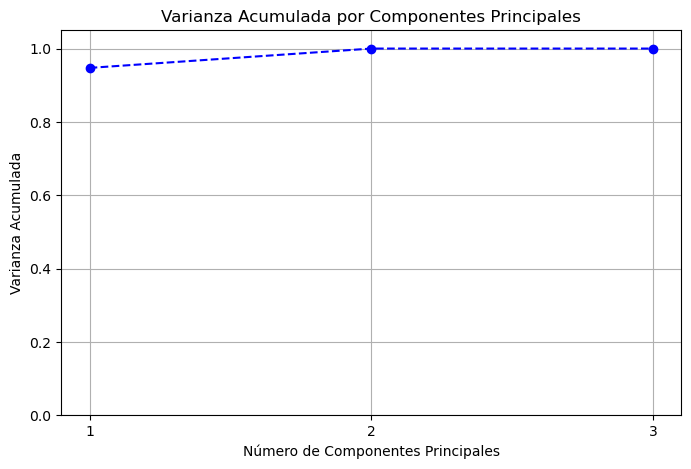

In [44]:

# 10. Visualización de la Varianza Acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.title('Varianza Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.xticks(range(1, len(cumulative_explained_variance)+1))
plt.ylim(0, 1.05)
plt.grid(True)
plt.show()

Relation between PCA for rows and SVD

# PCA for columns

In [48]:
COVCOL = np.cov(A1[:,:-1], rowvar=False, bias=False)

print(A1[:,:-1])

print("\nCovariance Matrix between Columns (COVCOL):")
print(pd.DataFrame(COVCOL, index=[f'Col{i+1}' for i in range(COVCOL.shape[0])],
                         columns=[f'Col{j+1}' for j in range(COVCOL.shape[1])]))

eigenvalues_col, eigenvectors_col = np.linalg.eig(A1[:,:-1])
sorted_indices_col = np.argsort(eigenvalues_col)[::-1]
eigenvalues_col = eigenvalues_col[sorted_indices_col]

# print the eigenvalues and eigenvectors
print("\nEigenvalues:")
print(eigenvalues_col)

print("\nEigenvectors (columns correspond to eigenvalues):")
print(pd.DataFrame(eigenvectors_col, index=[f'Col{i+1}' for i in range(eigenvectors_col.shape[0])],
                       columns=[f'Eigenvec{j+1}' for j in range(eigenvectors_col.shape[1])]))

[[1 1 0]
 [1 1 1]
 [1 1 0]]

Covariance Matrix between Columns (COVCOL):
      Col1  Col2      Col3
Col1   0.0   0.0  0.000000
Col2   0.0   0.0  0.000000
Col3   0.0   0.0  0.333333

Eigenvalues:
[ 2.41421356e+00 -5.17355866e-16 -4.14213562e-01]

Eigenvectors (columns correspond to eigenvalues):
      Eigenvec1     Eigenvec2  Eigenvec3
Col1  -0.500000 -7.071068e-01   0.500000
Col2  -0.707107  7.071068e-01  -0.707107
Col3  -0.500000 -3.294760e-16   0.500000


In [50]:
# Definir la matriz A con las filas adicionales
A = np.array([
    [2, 1, 0],
    [2, 1, 1],
    [4, 2, 0],
    [6, 3, 2],
    [0, 0, 1],
    [2, 1.000001, 0]
], dtype=float)
 
# Definir la tolerancia
TOLERANCIA = 1e-2
 
# Función para determinar las filas base con tolerancia
def obtener_filas_base(matriz, tolerancia):
    filas_base = []
    indices_base = []
    for i, fila in enumerate(matriz):
        if len(filas_base) == 0:
            filas_base.append(fila)
            indices_base.append(i)
        else:
            # Crear una matriz con las filas base actuales como columnas
            base_matrix = np.vstack(filas_base).T  # Cada columna es una fila base
            try:
                # Resolver el sistema base_matrix * coef = fila
                coeficientes, residuals, rango, _ = np.linalg.lstsq(base_matrix, fila, rcond=None)
                if residuals.size > 0:
                    residual_norm = np.sqrt(residuals[0])
                else:
                    # Calcular la norma del residual manualmente si residuals está vacío
                    residual = fila - base_matrix @ coeficientes
                    residual_norm = np.linalg.norm(residual)
                # Si la norma del residual es mayor que la tolerancia, agregar la fila a la base
                if residual_norm > tolerancia:
                    filas_base.append(fila)
                    indices_base.append(i)
            except np.linalg.LinAlgError:
                filas_base.append(fila)
                indices_base.append(i)
    return filas_base, indices_base
 
# Obtener las filas base y sus índices
filas_base, indices_base = obtener_filas_base(A, TOLERANCIA)
 
print("Filas base seleccionadas (índices comenzando en 0):", indices_base)
print("Filas base:")
for i, fila in zip(indices_base, filas_base):
    print(f"Fila {i+1}: {fila}")
 
# Función para expresar cada fila como combinación lineal de las filas base
def expresar_combinaciones(matriz, filas_base):
    base_matrix = np.vstack(filas_base).T  # Cada columna es una fila base
    combinaciones = []
    for i, fila in enumerate(matriz):
        # Resolver base_matrix * coef = fila
        coeficientes, residuals, rango, _ = np.linalg.lstsq(base_matrix, fila, rcond=None)
        combinaciones.append(coeficientes)
    return combinaciones
 
# Obtener las combinaciones lineales
combinaciones = expresar_combinaciones(A, filas_base)
 
print("\nExpresiones como combinaciones lineales de las filas base:")
for i, coef in enumerate(combinaciones):
    expresion = f"Fila {i+1} = "
    terminos = []
    for j, c in enumerate(coef):
        if abs(c) > 1e-10:  # Ignorar coeficientes cercanos a cero
            terminos.append(f"{c:.2f} * Fila {indices_base[j]+1}")
    expresion += " + ".join(terminos) if terminos else "0"
    print(expresion)

Filas base seleccionadas (índices comenzando en 0): [0, 1]
Filas base:
Fila 1: [2. 1. 0.]
Fila 2: [2. 1. 1.]

Expresiones como combinaciones lineales de las filas base:
Fila 1 = 1.00 * Fila 1
Fila 2 = 1.00 * Fila 2
Fila 3 = 2.00 * Fila 1
Fila 4 = 1.00 * Fila 1 + 2.00 * Fila 2
Fila 5 = -1.00 * Fila 1 + 1.00 * Fila 2
Fila 6 = 1.00 * Fila 1


Orthogonality and orthonomal?

In [11]:
norms = np.linalg.norm(eigenvectors_col, axis=0)
print("\nNorm of the eigenvectors:")
print(norms)

# Comprobation of the orthogonality of the eigenvectors
print("\nComprobation of the orthogonality of the eigenvectors:")
orthogonality_matrix = np.dot(eigenvectors_col.T, eigenvectors_col)

print("\nOrthogonality Check (Eigenvectors^T * Eigenvectors):")
print(pd.DataFrame(orthogonality_matrix, 
                  index=[f'Eigenvec{j+1}' for j in range(eigenvectors_col.shape[1])],
                  columns=[f'Eigenvec{j+1}' for j in range(eigenvectors_col.shape[1])]))

# Check if orthogonality_matrix is approximately an identity matrix
is_orthogonal = np.allclose(orthogonality_matrix, np.identity(eigenvectors_col.shape[1]))
print("\nAre the eigenvectors orthogonal? ", is_orthogonal)


Norm of the eigenvectors:
[1. 1. 1.]

Comprobation of the orthogonality of the eigenvectors:

Orthogonality Check (Eigenvectors^T * Eigenvectors):
              Eigenvec1     Eigenvec2     Eigenvec3
Eigenvec1  1.000000e+00 -1.978992e-16 -4.231822e-17
Eigenvec2 -1.978992e-16  1.000000e+00 -2.923882e-16
Eigenvec3 -4.231822e-17 -2.923882e-16  1.000000e+00

Are the eigenvectors orthogonal?  True


In [12]:
explained_variance_col = eigenvalues_col / eigenvalues_col.sum()
cumulative_explained_variance_col = np.cumsum(explained_variance_col)

variance_df_col = pd.DataFrame({
    'Componente Principal': [f'PC{i+1}' for i in range(len(eigenvalues_col))],
    'Eigenvalor':   eigenvalues_col,
    'Varianza Explicada': explained_variance_col,
    'Varianza Acumulada': cumulative_explained_variance_col
})
print("\nEigenvalues and Explained Variance:")
print(variance_df_col)


Eigenvalues and Explained Variance:
  Componente Principal  Eigenvalor  Varianza Explicada  Varianza Acumulada
0                  PC1    2.185665            0.945975            0.945975
1                  PC2    0.111093            0.048082            0.994057
2                  PC3    0.013731            0.005943            1.000000


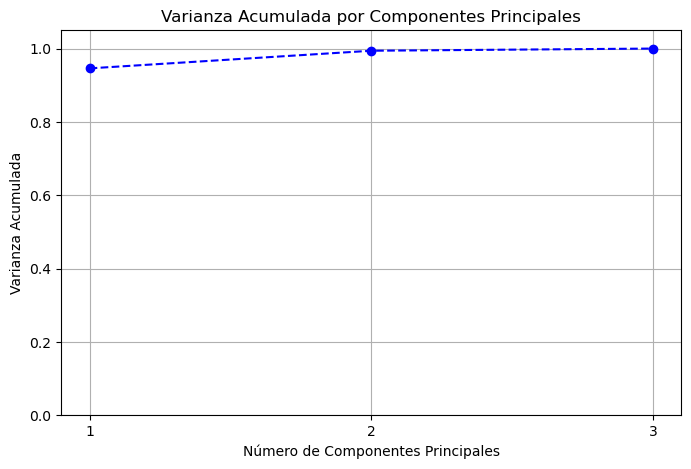

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance_col)+1), cumulative_explained_variance_col, marker='o', linestyle='--', color='b')
plt.title('Varianza Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.xticks(range(1, len(cumulative_explained_variance_col)+1))
plt.ylim(0, 1.05)
plt.grid(True)
plt.show()

In [14]:
def compare_eigenvectors(matrix1, matrix2, tolerance=1e-6):
    """
    Compare two matrices of eigenvectors up to sign.
    
    Parameters:
    - matrix1: First matrix (numpy.ndarray), shape (n, m)
    - matrix2: Second matrix (numpy.ndarray), shape (n, m)
    - tolerance: Tolerance for comparison
    
    Returns:
    - List of tuples indicating if each pair matches (with possible sign flip)
    """
    n, m = matrix1.shape
    matches = []
    for i in range(m):
        vec1 = matrix1[:, i]
        vec2 = matrix2[:, i]
        
        # Normalize vectors to ensure unit length
        vec1_norm = vec1 / np.linalg.norm(vec1)
        vec2_norm = vec2 / np.linalg.norm(vec2)
        
        # Check if vectors are the same or negatives
        if np.allclose(vec1_norm, vec2_norm, atol=tolerance):
            matches.append((i+1, "Same"))
        elif np.allclose(vec1_norm, -vec2_norm, atol=tolerance):
            matches.append((i+1, "Opposite"))
        else:
            matches.append((i+1, "Different"))
    return matches

# 9. Check if U from SVD is the same as eigenvectors of COVROW
print("\n--- Comparison between U (from SVD) and Eigenvectors of COVROW ---")
comparison_U = compare_eigenvectors(U, eigenvectors_row)
for idx, status in comparison_U:
    print(f"U column {idx} is {status} to Eigenvector {idx} of COVROW.")

# 10. Check if V from SVD is the same as eigenvectors of COVCOL
print("\n--- Comparison between V (from SVD) and Eigenvectors of COVCOL ---")
V = Vt.T  # V from SVD is the transpose of Vt
comparison_V = compare_eigenvectors(V, eigenvectors_col)
for idx, status in comparison_V:
    print(f"V column {idx} is {status} to Eigenvector {idx} of COVCOL.")


--- Comparison between U (from SVD) and Eigenvectors of COVROW ---
U column 1 is Different to Eigenvector 1 of COVROW.
U column 2 is Different to Eigenvector 2 of COVROW.
U column 3 is Different to Eigenvector 3 of COVROW.
U column 4 is Different to Eigenvector 4 of COVROW.
U column 5 is Different to Eigenvector 5 of COVROW.

--- Comparison between V (from SVD) and Eigenvectors of COVCOL ---


ValueError: operands could not be broadcast together with shapes (4,) (3,) 

In [39]:
import numpy as np
# Step 1: Center the rows of A
A_centered = A - A.mean(axis=1, keepdims=True)

print(A_centered.shape)

# Step 2: Compute covariance matrix using np.cov
row_cov_np = np.cov(A, rowvar=False)

# Step 3: Perform SVD
U_n, S_n, VT_n = np.linalg.svd(A_centered)
Sigma_n = np.zeros((U_n.shape[1], VT_n.shape[0])) /A_centered.shape[1]-1
np.fill_diagonal(Sigma_n, S_n)

# Step 4: Reconstruct the covariance matrix from SVD
row_cov_svd = (U_n @ Sigma_n @ VT_n)

print("Row-wise covariance matrix using np.cov:")
print(row_cov_np)

print("\nRow-wise covariance matrix reconstructed from SVD:")
print(row_cov_svd)


(5, 4)
Row-wise covariance matrix using np.cov:
[[ 1.49752    0.9381055 -0.3745     0.50025  ]
 [ 0.9381055  0.6129692 -0.21305    0.3621   ]
 [-0.3745    -0.21305    0.2       -0.025    ]
 [ 0.50025    0.3621    -0.025      0.3      ]]

Row-wise covariance matrix reconstructed from SVD:
[[ 0.06933305  2.38094304  0.37450401 -0.41584532]
 [ 1.21330595  0.75669835 -2.47088631  0.6292672 ]
 [ 1.82538536  0.33261829 -0.6324383   0.2231304 ]
 [-0.38484334  1.58917248  0.60300979  0.59023242]
 [-1.07522448 -0.16394468  1.22243212  1.18902763]]


In [155]:
# Take te first row of A2 matrix
row = A2[0,:]
row2 = A2[1,:]
# calculate the variance of the row
variance = np.var(row, ddof=1)
print(f"\nVariance of the first row of A2: {variance}")
# covariance between the first and second row
covariance = np.cov(row, row2, bias=False)
print(f"Covariance between the first and second row of A2: {covariance}")


Variance of the first row of A2: 0.6666666666666666
Covariance between the first and second row of A2: [[0.66666667 1.        ]
 [1.         1.58333333]]


Matrix A:
[[1.  1.  0.  0.  1.5]
 [1.  1.  0.  2.  0. ]
 [1.  1.  0.  0.  2. ]
 [1.  1.  2.  2.  2. ]]

Matrix U:
[[ 0.35757154  0.47036932  0.28143659  0.75610102]
 [ 0.36360358 -0.58385809  0.7217436  -0.07738439]
 [ 0.4210896   0.6003679   0.20399442 -0.64855856]
 [ 0.75007905 -0.27824597 -0.59855317  0.04116673]]

Singular Values (S):
[4.76029861 2.27850537 1.53924293 0.16941567]

Matrix V^T:
[[ 0.39752627  0.39752627  0.3151395   0.46790452  0.60472984]
 [ 0.0915658   0.0915658  -0.24423552 -0.75672769  0.59240495]
 [ 0.39540311  0.39540311 -0.77772411  0.16006626 -0.23840462]
 [ 0.42100469  0.42100469  0.48598489 -0.42755976 -0.47594268]]

Reconstructed Matrix A:
[[ 1.00000000e+00  1.00000000e+00  1.13974622e-16  1.84822447e-17
   1.50000000e+00]
 [ 1.00000000e+00  1.00000000e+00 -4.63172550e-16  2.00000000e+00
  -3.95377742e-16]
 [ 1.00000000e+00  1.00000000e+00  9.35899009e-18 -4.87938674e-16
   2.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  2.00000000e+00  2.00000000e+00
 

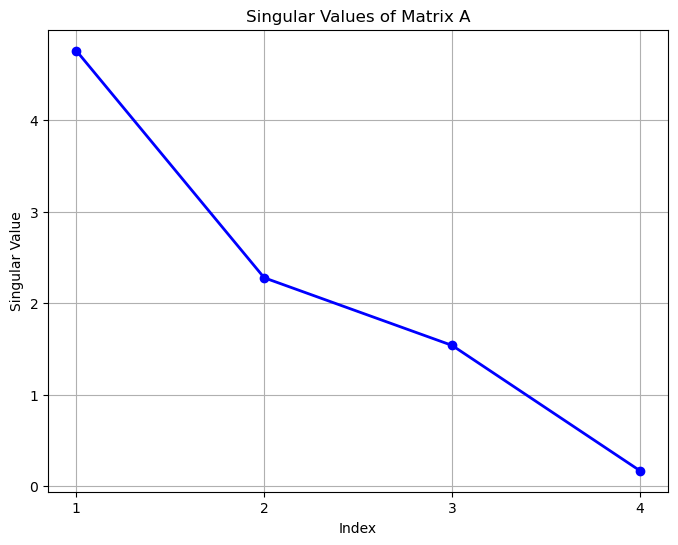

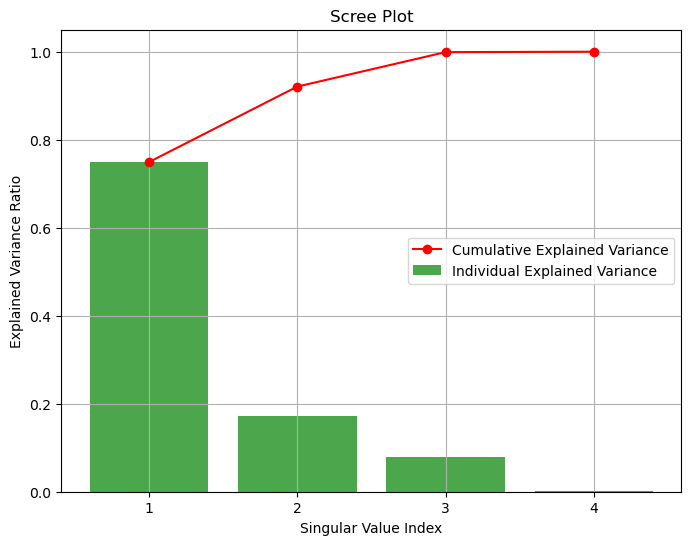

In [156]:

 
# 1. Define matrix A
A = np.array([
    [1, 1, 0, 0, 1.5],
    [1, 1, 0, 2, 0],
    [1, 1, 0, 0, 2],
    [1, 1, 2, 2, 2]
])
 
print("Matrix A:")
print(A)

A_extended = A
 
# 2. Perform SVD
U, S, Vt = np.linalg.svd(A_extended, full_matrices=False)
 
print("\nMatrix U:")
print(U)
 
print("\nSingular Values (S):")
print(S)
 
print("\nMatrix V^T:")
print(Vt)
 
# 3. Reconstruct matrix A
Sigma = np.diag(S)
A_reconstructed = np.dot(U, np.dot(Sigma, Vt))
 
print("\nReconstructed Matrix A:")
print(A_reconstructed)
 
# 4. Calculate reconstruction error
reconstruction_error = np.linalg.norm(A - A_reconstructed, ord='fro')
print("\nReconstruction Error (Frobenius Norm):")
print(reconstruction_error)
 
# 5. Plot singular values
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(S)+1), S, 'o-', linewidth=2, color='blue')
plt.title('Singular Values of Matrix A')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True)
plt.xticks(range(1, len(S)+1))
plt.show()
 
# 6. Plot Scree Plot
explained_variance_ratio = (S ** 2) / np.sum(S ** 2)
 
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(S)+1), explained_variance_ratio, alpha=0.7, color='green', label='Individual Explained Variance')
plt.plot(range(1, len(S)+1), np.cumsum(explained_variance_ratio), marker='o', color='red', label='Cumulative Explained Variance')
plt.title('Scree Plot')
plt.xlabel('Singular Value Index')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(S)+1))
plt.legend(loc='best')
plt.grid(True)
plt.show()
